# 1. Import
## 1.1. Librairies

In [1]:
import scanpy as sc
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

## 1.2. Data

In [2]:
covid_data = sc.read_h5ad("/Users/scarcy/Projects/HumanThymusProject/data/raw_data/human_data/combat-COVID/COMBAT-CITESeq-DATA.h5ad") # takes 2min to import
print(covid_data)

AnnData object with n_obs × n_vars = 836148 × 20807
    obs: 'Annotation_cluster_id', 'Annotation_cluster_name', 'Annotation_minor_subset', 'Annotation_major_subset', 'Annotation_cell_type', 'GEX_region', 'QC_ngenes', 'QC_total_UMI', 'QC_pct_mitochondrial', 'QC_scrub_doublet_scores', 'TCR_chain_composition', 'TCR_clone_ID', 'TCR_clone_count', 'TCR_clone_proportion', 'TCR_contains_unproductive', 'TCR_doublet', 'TCR_chain_TRA', 'TCR_v_gene_TRA', 'TCR_d_gene_TRA', 'TCR_j_gene_TRA', 'TCR_c_gene_TRA', 'TCR_productive_TRA', 'TCR_cdr3_TRA', 'TCR_umis_TRA', 'TCR_chain_TRA2', 'TCR_v_gene_TRA2', 'TCR_d_gene_TRA2', 'TCR_j_gene_TRA2', 'TCR_c_gene_TRA2', 'TCR_productive_TRA2', 'TCR_cdr3_TRA2', 'TCR_umis_TRA2', 'TCR_chain_TRB', 'TCR_v_gene_TRB', 'TCR_d_gene_TRB', 'TCR_j_gene_TRB', 'TCR_c_gene_TRB', 'TCR_productive_TRB', 'TCR_chain_TRB2', 'TCR_v_gene_TRB2', 'TCR_d_gene_TRB2', 'TCR_j_gene_TRB2', 'TCR_c_gene_TRB2', 'TCR_productive_TRB2', 'TCR_cdr3_TRB2', 'TCR_umis_TRB2', 'BCR_umis_HC', 'BCR_contig_qc_H

In [3]:
dataT = covid_data[covid_data.obs["Annotation_cell_type"].isin(['T'])] # could also include 'NK'
dataT.obs

Annotation_cluster_id Annotation_cluster_name  \
AAACCTGAGCGGATCA-1-gPlexA1                20011.0             CD8.TEMRA.1   
AAACCTGCAGCTCGAC-1-gPlexA1                10110.0                  CD4.Th   
AAACCTGCATCTATGG-1-gPlexA1                20211.0                 CD8.TEM   
AAACCTGGTCTCTCTG-1-gPlexA1                10210.0             CD4.NAIVE.2   
AAACCTGTCACCGGGT-1-gPlexA1                20211.0                 CD8.TEM   
...                                           ...                     ...   
TTTGGTTTCCTCAACC-1-gPlexK7                10010.0             CD4.NAIVE.1   
TTTGGTTTCTCGATGA-1-gPlexK7                10010.0             CD4.NAIVE.1   
TTTGTCACACCACGTG-1-gPlexK7                20411.0      CD8.TEMRA.mitohi.1   
TTTGTCAGTTACCGAT-1-gPlexK7                20211.0                 CD8.TEM   
TTTGTCATCCTCTAGC-1-gPlexK7                21311.0      CD8.TEMRA.mitohi.2   

                           Annotation_minor_subset Annotation_major_subset  \
AAACCTGAGCGGATCA-1-gPlexA1               CD8.TEMRA                     CD8   
AAACCTGCAGCTCGAC-1-gPlexA1                 CD4.TCM                     CD4   
AAACCTGCATCTATGG-1-gPlexA1                 CD8.TEM                     CD8   
AAACCTGGTCTCTCTG-1-gPlexA1               CD4.NAIVE                     CD4   
AAACCTGTCACCGGGT-1-gPlexA1                 CD8.TEM                     CD8   
...                                            ...                     ...   
TTTGGTTTCCTCAACC-1-gPlexK7               CD4.NAIVE                     CD4   
TTTGGTTTCTCGATGA-1-gPlexK7               CD4.NAIVE                     CD4   
TTTGTCACACCACGTG-1-gPlexK7              CD8.mitohi                     CD8   
TTTGTCAGTTACCGAT-1-gPlexK7                 CD8.TEM                     CD8   
TTTGTCATCCTCTAGC-1-gPlexK7              CD8.mitohi                     CD8   

                           Annotation_cell_type                 GEX_region  \
AAACCTGAGCGGATCA-1-gPlexA1                    T  B: TEM/prolif. T/NK cells   
AAACCTGCAGCTCGAC-1-gPlexA1                    T  A: CD4/naive/reg. T cells   
AAACCTGCATCTATGG-1-gPlexA1                    T  B: TEM/prolif. T/NK cells   
AAACCTGGTCTCTCTG-1-gPlexA1                    T  A: CD4/naive/reg. T cells   
AAACCTGTCACCGGGT-1-gPlexA1                    T  B: TEM/prolif. T/NK cells   
...                                         ...                        ...   
TTTGGTTTCCTCAACC-1-gPlexK7                    T  A: CD4/naive/reg. T cells   
TTTGGTTTCTCGATGA-1-gPlexK7                    T  A: CD4/naive/reg. T cells   
TTTGTCACACCACGTG-1-gPlexK7                    T  B: TEM/prolif. T/NK cells   
TTTGTCAGTTACCGAT-1-gPlexK7                    T  B: TEM/prolif. T/NK cells   
TTTGTCATCCTCTAGC-1-gPlexK7                    T  B: TEM/prolif. T/NK cells   

                            QC_ngenes  QC_total_UMI  QC_pct_mitochondrial  \
AAACCTGAGCGGATCA-1-gPlexA1       1348          3162              1.138520   
AAACCTGCAGCTCGAC-1-gPlexA1       1194          4074              0.589102   
AAACCTGCATCTATGG-1-gPlexA1       1208          2831              2.296008   
AAACCTGGTCTCTCTG-1-gPlexA1        763          2163              0.970874   
AAACCTGTCACCGGGT-1-gPlexA1       1760          6279              1.019271   
...                               ...           ...                   ...   
TTTGGTTTCCTCAACC-1-gPlexK7        959          2196              2.686703   
TTTGGTTTCTCGATGA-1-gPlexK7       1548          5679              1.584786   
TTTGTCACACCACGTG-1-gPlexK7       2075          5429              2.026156   
TTTGTCAGTTACCGAT-1-gPlexK7       1157          3318              1.476793   
TTTGTCATCCTCTAGC-1-gPlexK7        502           627              7.017544   

                            QC_scrub_doublet_scores  ... Requiredvasoactive  \
AAACCTGAGCGGATCA-1-gPlexA1                 0.041541  ...                0.0   
AAACCTGCAGCTCGAC-1-gPlexA1                 0.055772  ...                1.0   
AAACCTGCATCTATGG-1-gPlexA1                 0.141426  ...           

/Users/scarcy/opt/anaconda3/envs/humanthymusproj/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


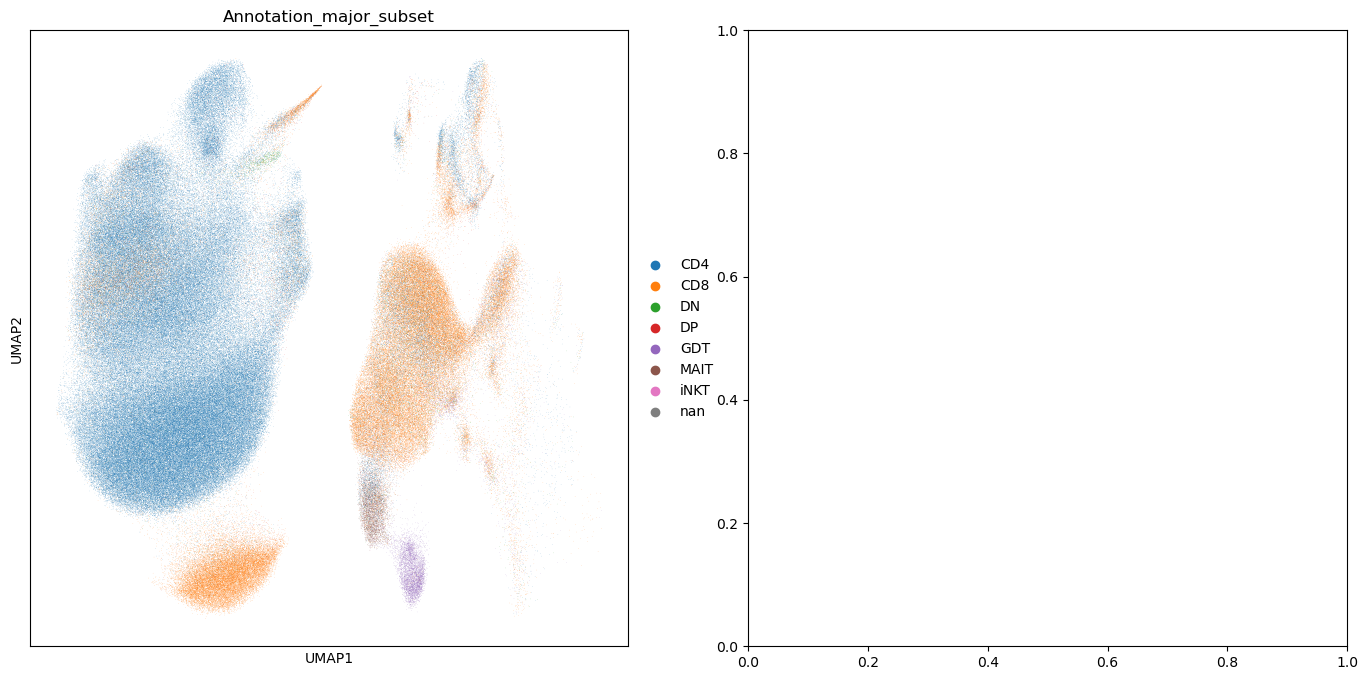

/Users/scarcy/opt/anaconda3/envs/humanthymusproj/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [12]:
# plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))
sc.pl.umap(dataT, color="Annotation_major_subset", ax=ax1)
sc.pl.umap(dataT, color="Annotation_minor_subset", ax=ax2)
#fig.savefig("/Users/scarcy/Projects/HumanThymusProject/scripts-in-progress/human-PBMC/HumanData_25_DiseaseGEPscoring/plots/covid_umapmajor.jpeg", dpi=300, bbox_inches="tight")
#sc.pl.umap(dataT, color="Annotation_minor_subset", legend_loc="on data", legend_fontsize=10, legend_fontoutline=2)

# 2. Score GEPs
## 2.1. Check if GEP genes present in dataset

In [14]:
gep_topgenes = pd.read_csv("/Users/scarcy/Projects/HumanThymusProject/data/human-PBMC/HumanData_22_CompareGeneLists/genes_per_gep_post_rank_threshold.csv", index_col=0)
gep_topgenes = gep_topgenes[["GEP1", "GEP4", "GEP5", "GEP6", "GEP8", "GEP11", "GEP12"]]
gep_topgenes
# gep_topgenes.loc[:,"GEP_1"].dropna().tolist()

GEP1    GEP4      GEP5        GEP6     GEP8       GEP11     GEP12
rank                                                                     
1       PRR5  CX3CR1      DSC1       FXYD1  TMEM163     LAPTM4B      SKA3
2        LTK  FGFBP2  CFAP97D2        PI16     FGD4     ZC3H12C     NCAPH
3       ITCH  LILRB1     MMP28  ST6GALNAC1    NRROS       DUSP4      PLK4
4     PLXND1  PRSS23    SLC7A8      GPR183    PPM1H       TNIP3  RAD51AP1
5      SPCS3    GZMH     NRCAM        LMNA     RTP5      LRRC32     PCLAF
...      ...     ...       ...         ...      ...         ...       ...
1117     NaN     NaN       NaN         NaN      NaN        SMG9       NaN
1118     NaN     NaN       NaN         NaN      NaN        GARS       NaN
1119     NaN     NaN       NaN         NaN      NaN        MED8       NaN
1120     NaN     NaN       NaN         NaN      NaN  PIK3CD.AS1       NaN
1121     NaN     NaN       NaN         NaN      NaN      TMEM60       NaN

[1121 rows x 7 columns]

In [16]:
# Function to count elements present in array 1 vs array 2
def count_genes(gep, dataset_genes=dataT.var_names):
    gep_genes = gep_topgenes.loc[:,gep].dropna().tolist()
    nbgenes_present = set(gep_genes) & set(dataset_genes)
    # Print
    print("Nb of GEP genes:", len(set(gep_genes)))
    print("Nb of GEP genes present in dataset:", len(nbgenes_present))

# Check for GEPs of interest
print("GEP1")
count_genes(gep="GEP1")
print("GEP4")
count_genes(gep="GEP4")
print("GEP5")
count_genes(gep="GEP5")
print("GEP6")
count_genes(gep="GEP6")
print("GEP8")
count_genes(gep="GEP8")
print("GEP11")
count_genes(gep="GEP11")
print("GEP12")
count_genes(gep="GEP12")

GEP1
Nb of GEP genes: 503
Nb of GEP genes present in dataset: 453
GEP4
Nb of GEP genes: 471
Nb of GEP genes present in dataset: 411
GEP5
Nb of GEP genes: 705
Nb of GEP genes present in dataset: 569
GEP6
Nb of GEP genes: 500
Nb of GEP genes present in dataset: 408
GEP8
Nb of GEP genes: 705
Nb of GEP genes present in dataset: 604
GEP11
Nb of GEP genes: 1121
Nb of GEP genes present in dataset: 1009
GEP12
Nb of GEP genes: 899
Nb of GEP genes present in dataset: 838


## 2.2. Score GEPs

In [37]:
# Verify that normalized data is present
dataT.X[1:10,1:10].todense() # looks like normalized data
# dataT.layers['raw'][1:10,1:10].todense() # raw data

matrix([[0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 1.4261292],
        [0.       , 0.       , 0.       , 1.2397038, 0.       ,
         0.       , 0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       , 0.9526652, 0.       ,
         0.       , 0.       , 0.       , 0.9526652],
        [0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       , 1.5229024, 0. 

In [18]:
# Score GEPs
sc.tl.score_genes(dataT, gene_list=gep_topgenes.loc[:,"GEP1"].dropna().tolist(), score_name="GEP1", use_raw=False)
sc.tl.score_genes(dataT, gene_list=gep_topgenes.loc[:,"GEP4"].dropna().tolist(), score_name="GEP4", use_raw=False)
sc.tl.score_genes(dataT, gene_list=gep_topgenes.loc[:,"GEP5"].dropna().tolist(), score_name="GEP5", use_raw=False)
sc.tl.score_genes(dataT, gene_list=gep_topgenes.loc[:,"GEP6"].dropna().tolist(), score_name="GEP6", use_raw=False)
sc.tl.score_genes(dataT, gene_list=gep_topgenes.loc[:,"GEP8"].dropna().tolist(), score_name="GEP8", use_raw=False)
sc.tl.score_genes(dataT, gene_list=gep_topgenes.loc[:,"GEP11"].dropna().tolist(), score_name="GEP11", use_raw=False)
sc.tl.score_genes(dataT, gene_list=gep_topgenes.loc[:,"GEP12"].dropna().tolist(), score_name="GEP12", use_raw=False)

In [20]:
dataT.obs
# save as .csv file
pd.DataFrame(dataT.obs).to_csv("~/Projects/HumanThymusProject/data/human-PBMC/HumanData_25_DiseaseGEPscoring/covid_metadata_withGEPs.csv")

[<Axes: title={'center': 'GEP1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'GEP4'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'GEP5'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'GEP6'}, xlabel='UMAP1', ylabel='UMAP2'>]

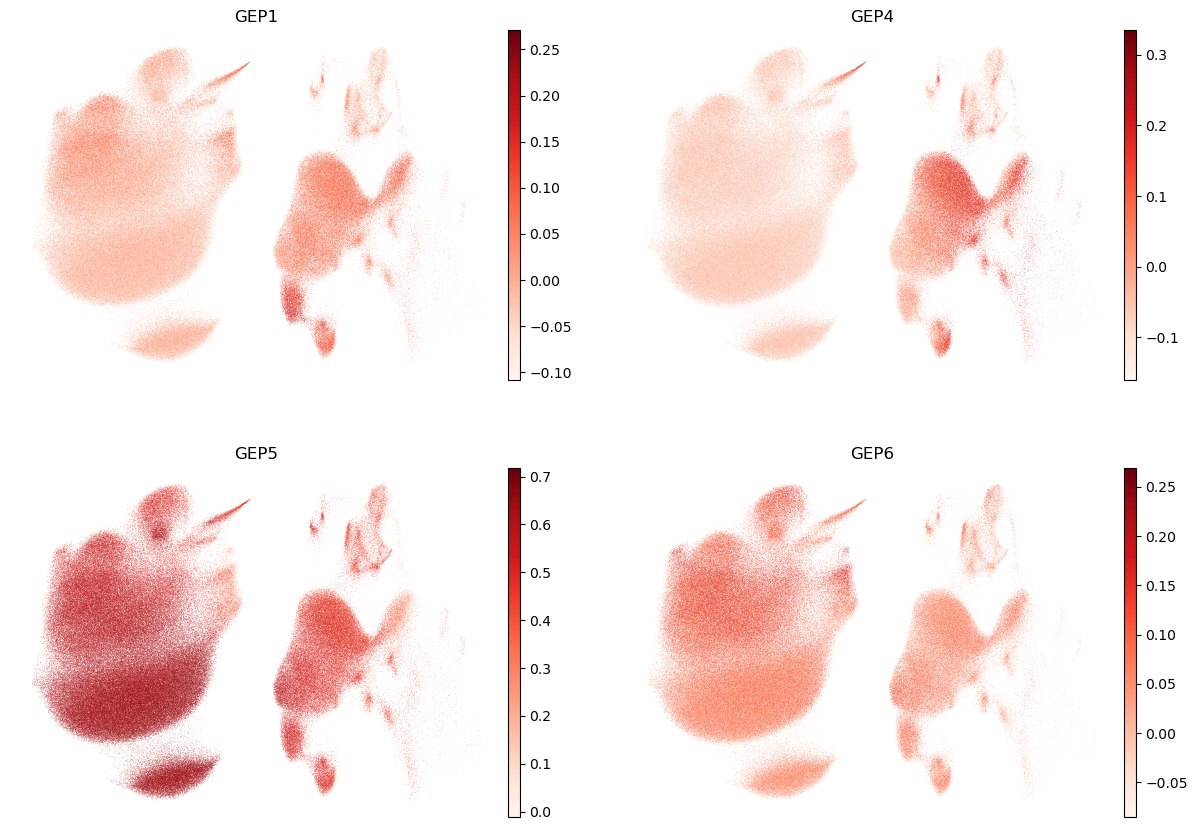

In [21]:
# GEP1
#fig = plt.figure(figsize=(13,5))
sc.pl.umap(dataT, color=["GEP1", "GEP4", "GEP5", "GEP6"], color_map=mpl.cm.Reds, ncols=2, frameon=False, show=False) #, save="poon_umap_gep1"

In [67]:
dataT.obs.DiseaseClassification.unique()

['COVID-19;MONDO:0100096', 'NA', 'Sepsis;HP:0100806', 'Influenza;MONDO:0005812']
Categories (4, object): ['COVID-19;MONDO:0100096', 'Influenza;MONDO:0005812', 'NA', 'Sepsis;HP:0100806']

/Users/scarcy/opt/anaconda3/envs/humanthymusproj/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


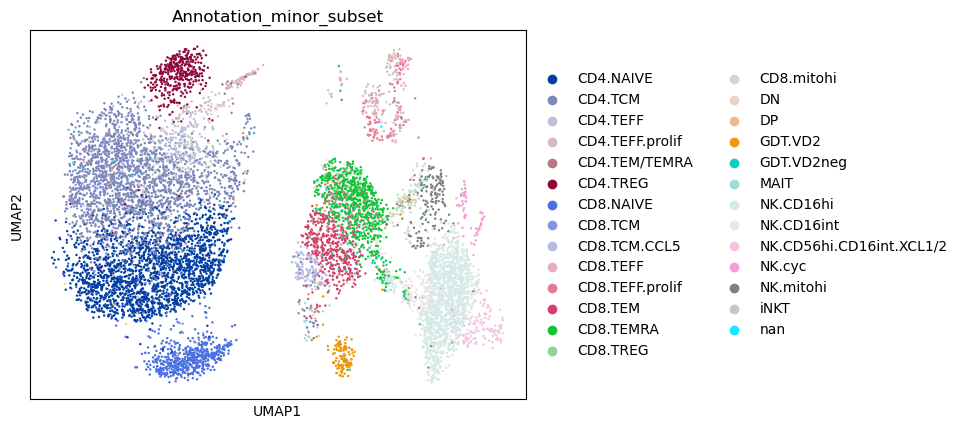

In [73]:
ax=plt.subplot()
#sc.pl.umap(dataT, ax=ax, show=False)
sc.pl.umap(dataT[dataT.obs["DiseaseClassification"].isin(["Influenza;MONDO:0005812"])], color="Annotation_minor_subset", ax=ax, show=False)
plt.show()

#sc.pl.umap(dataT, color="Annotation_minor_subset")


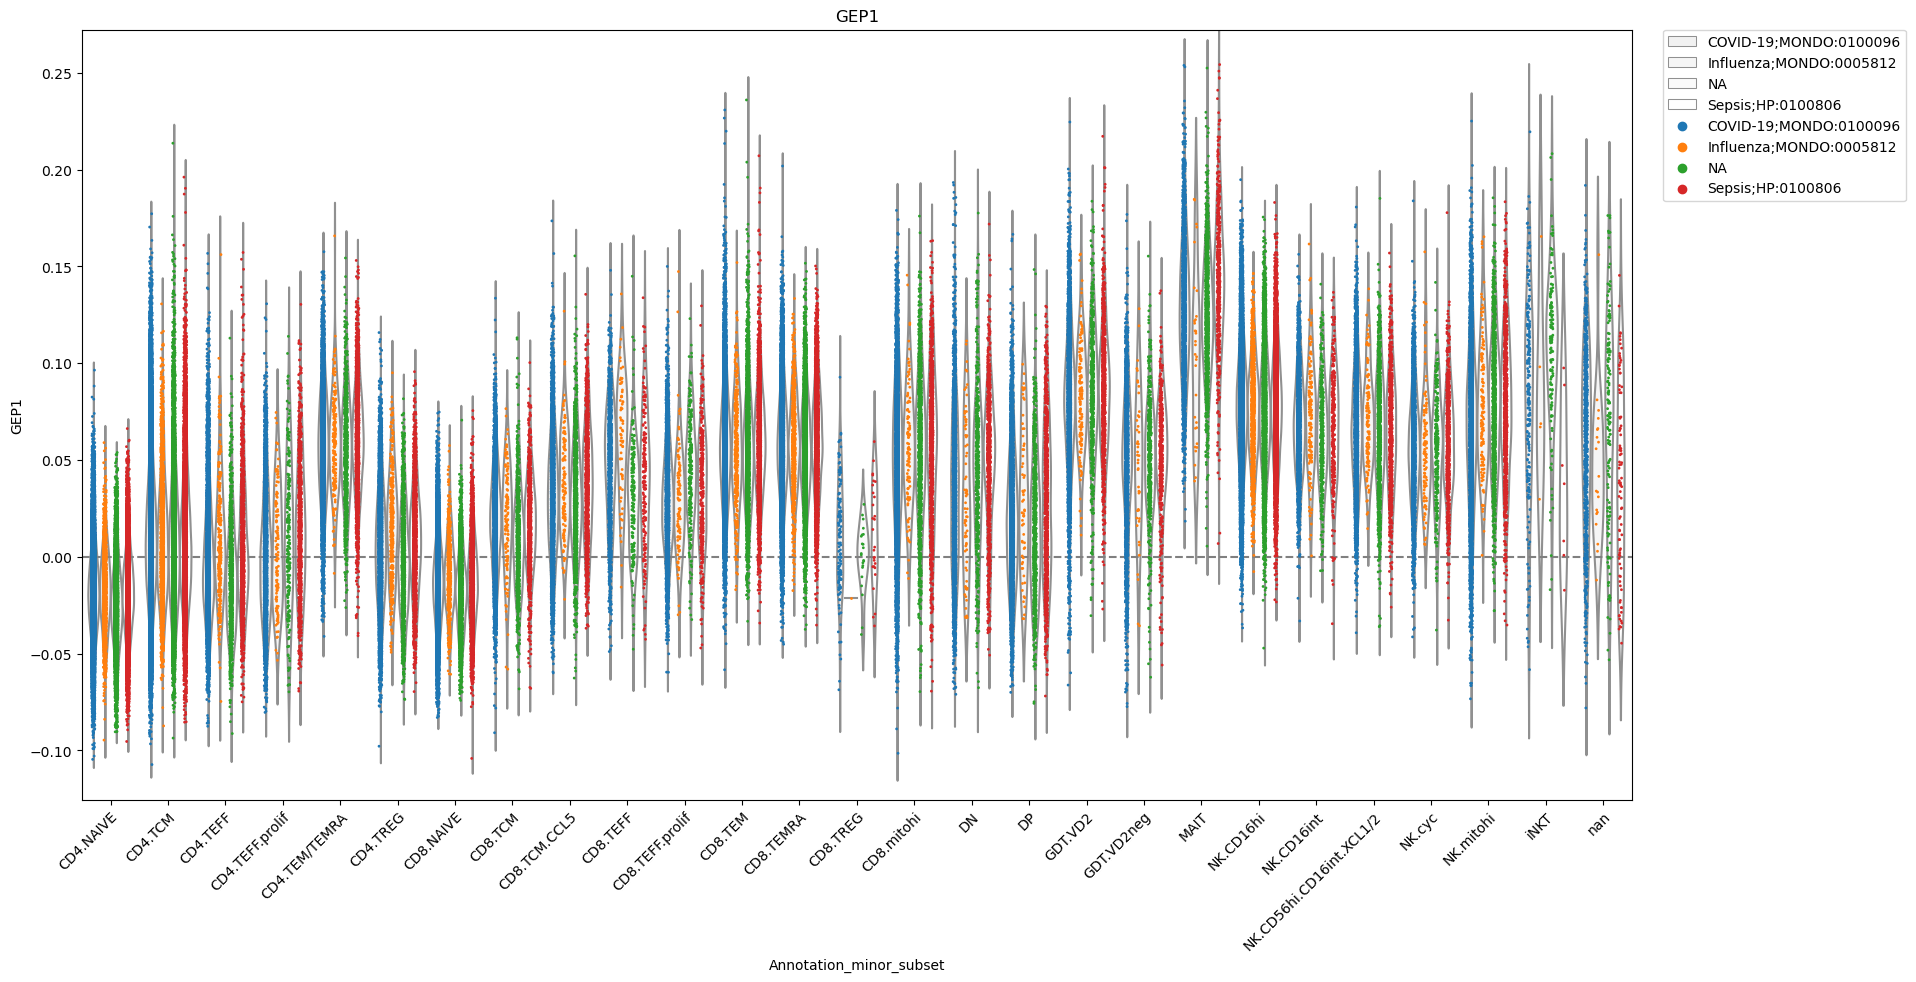

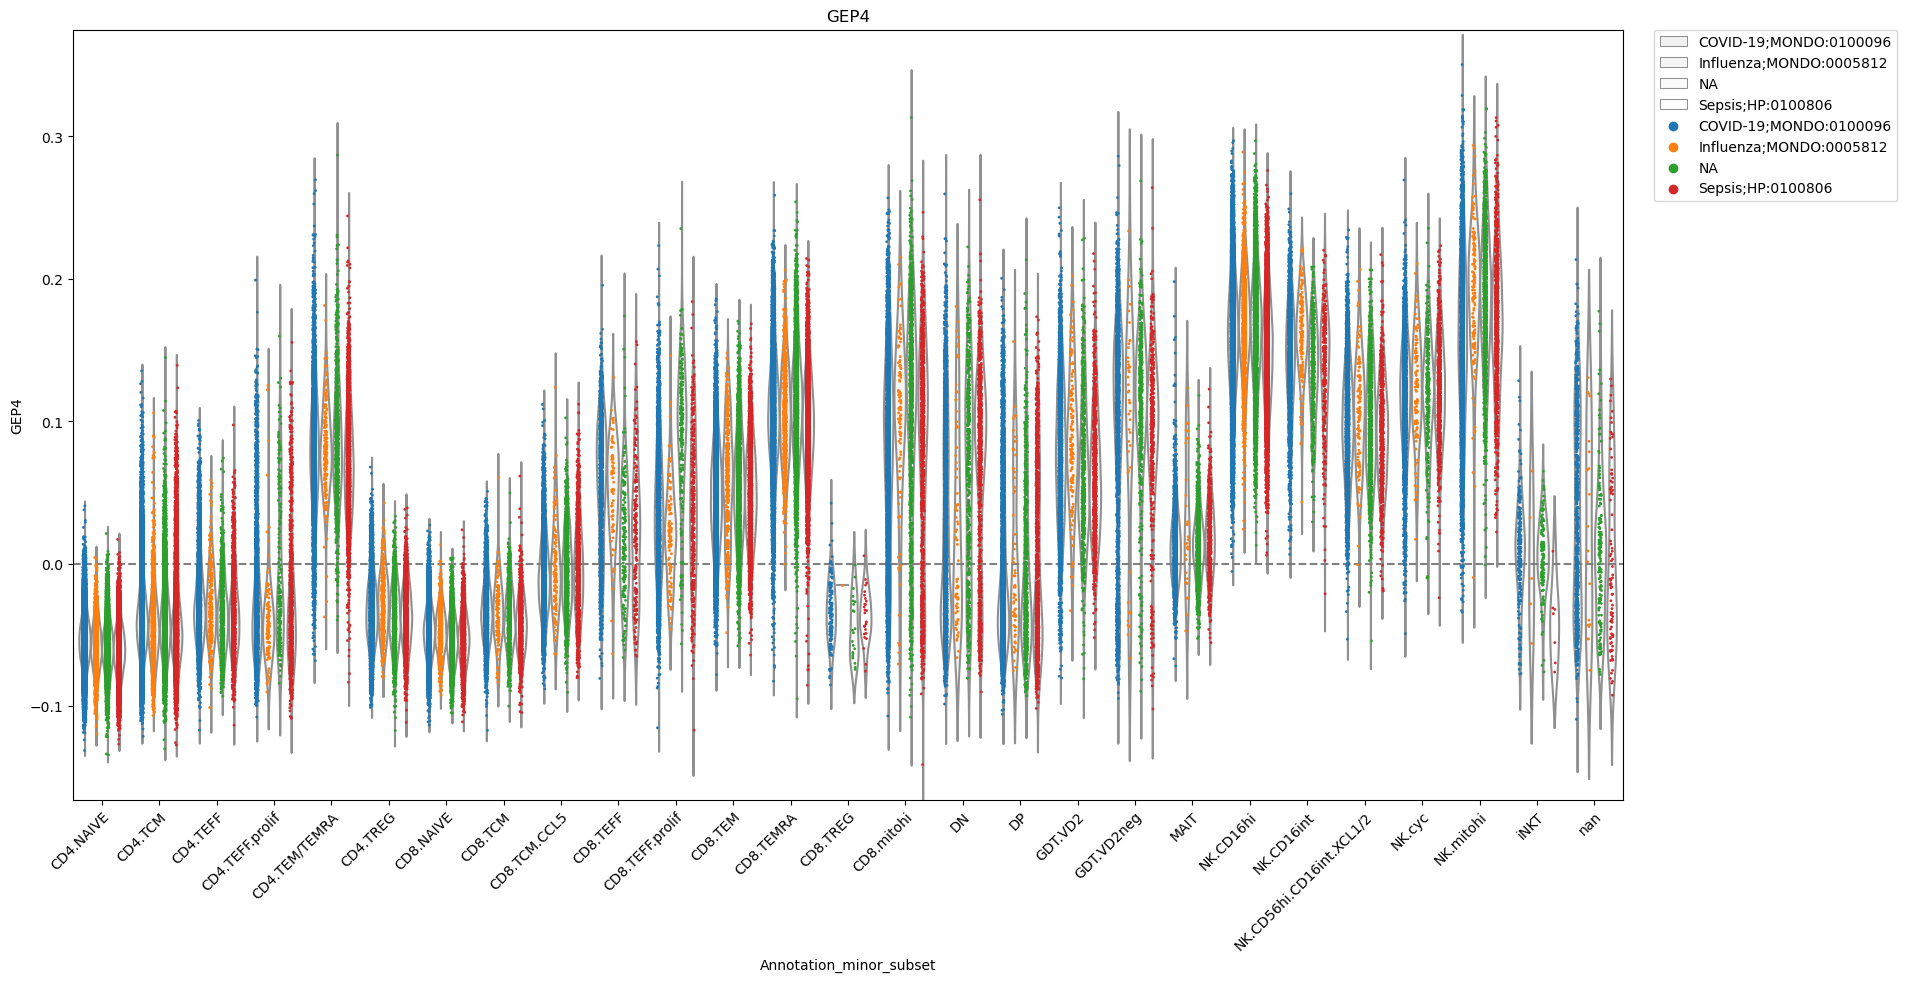

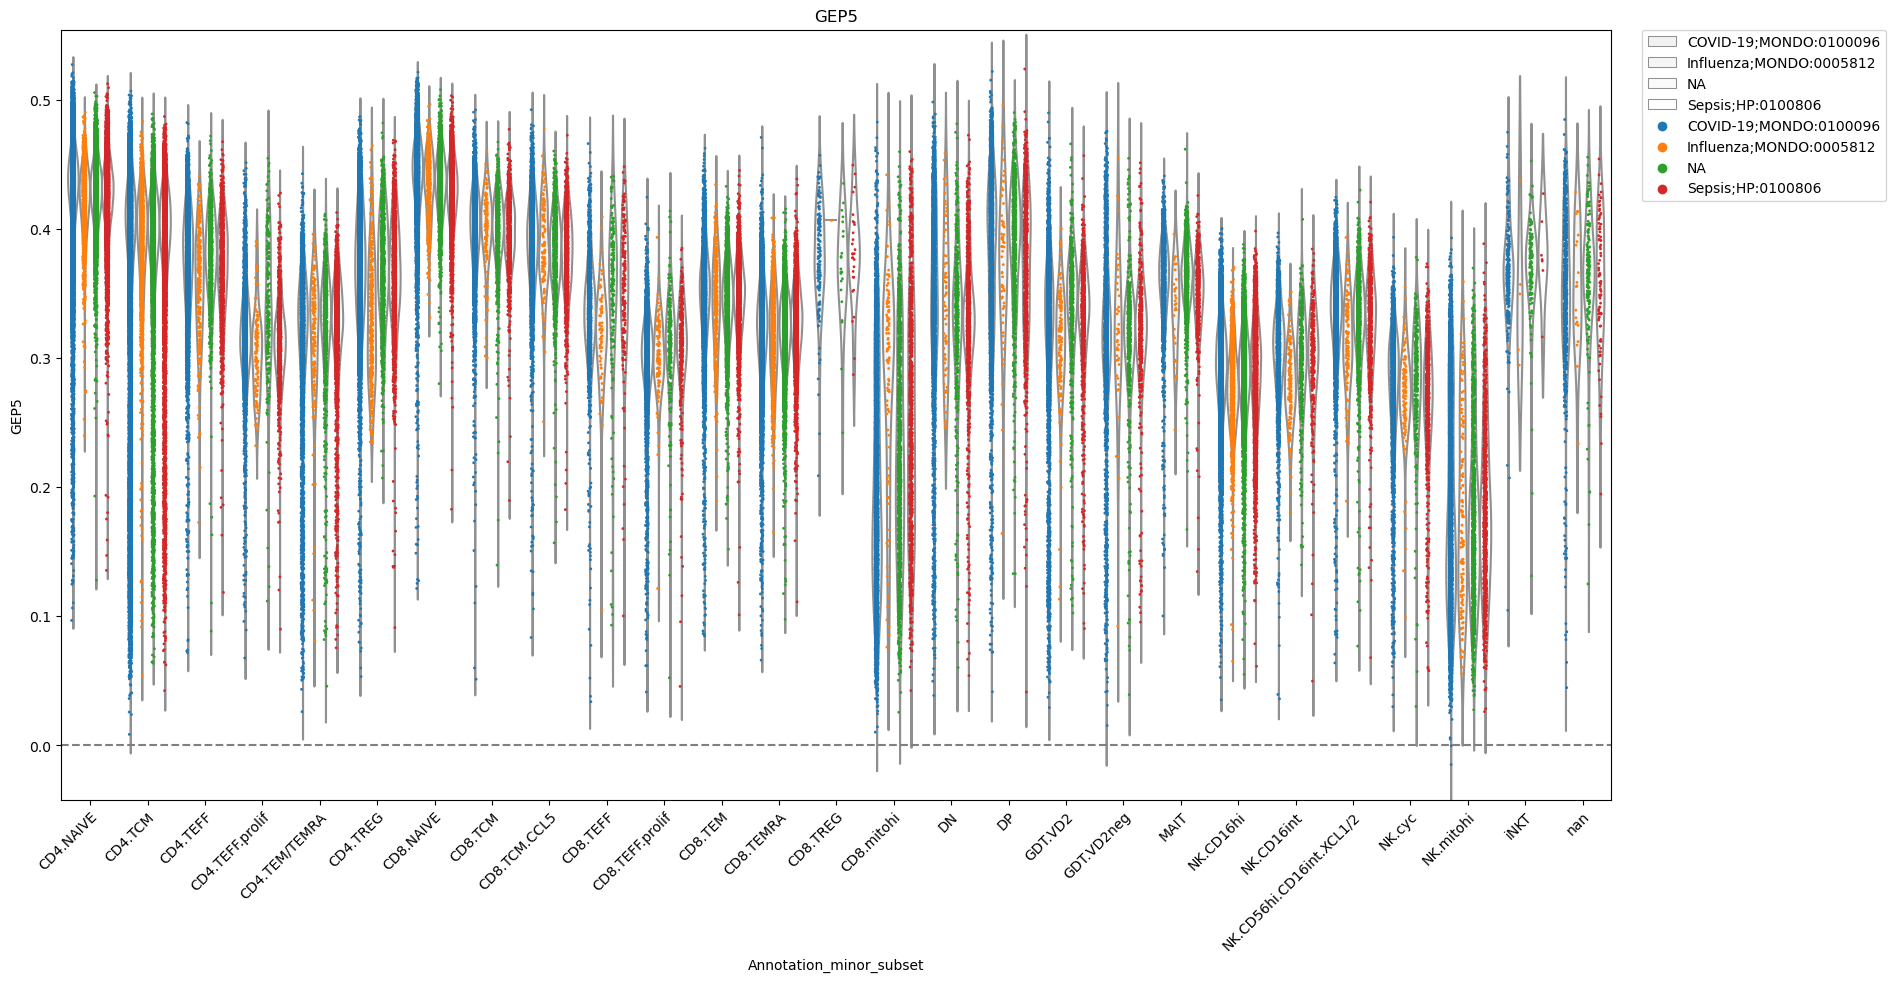

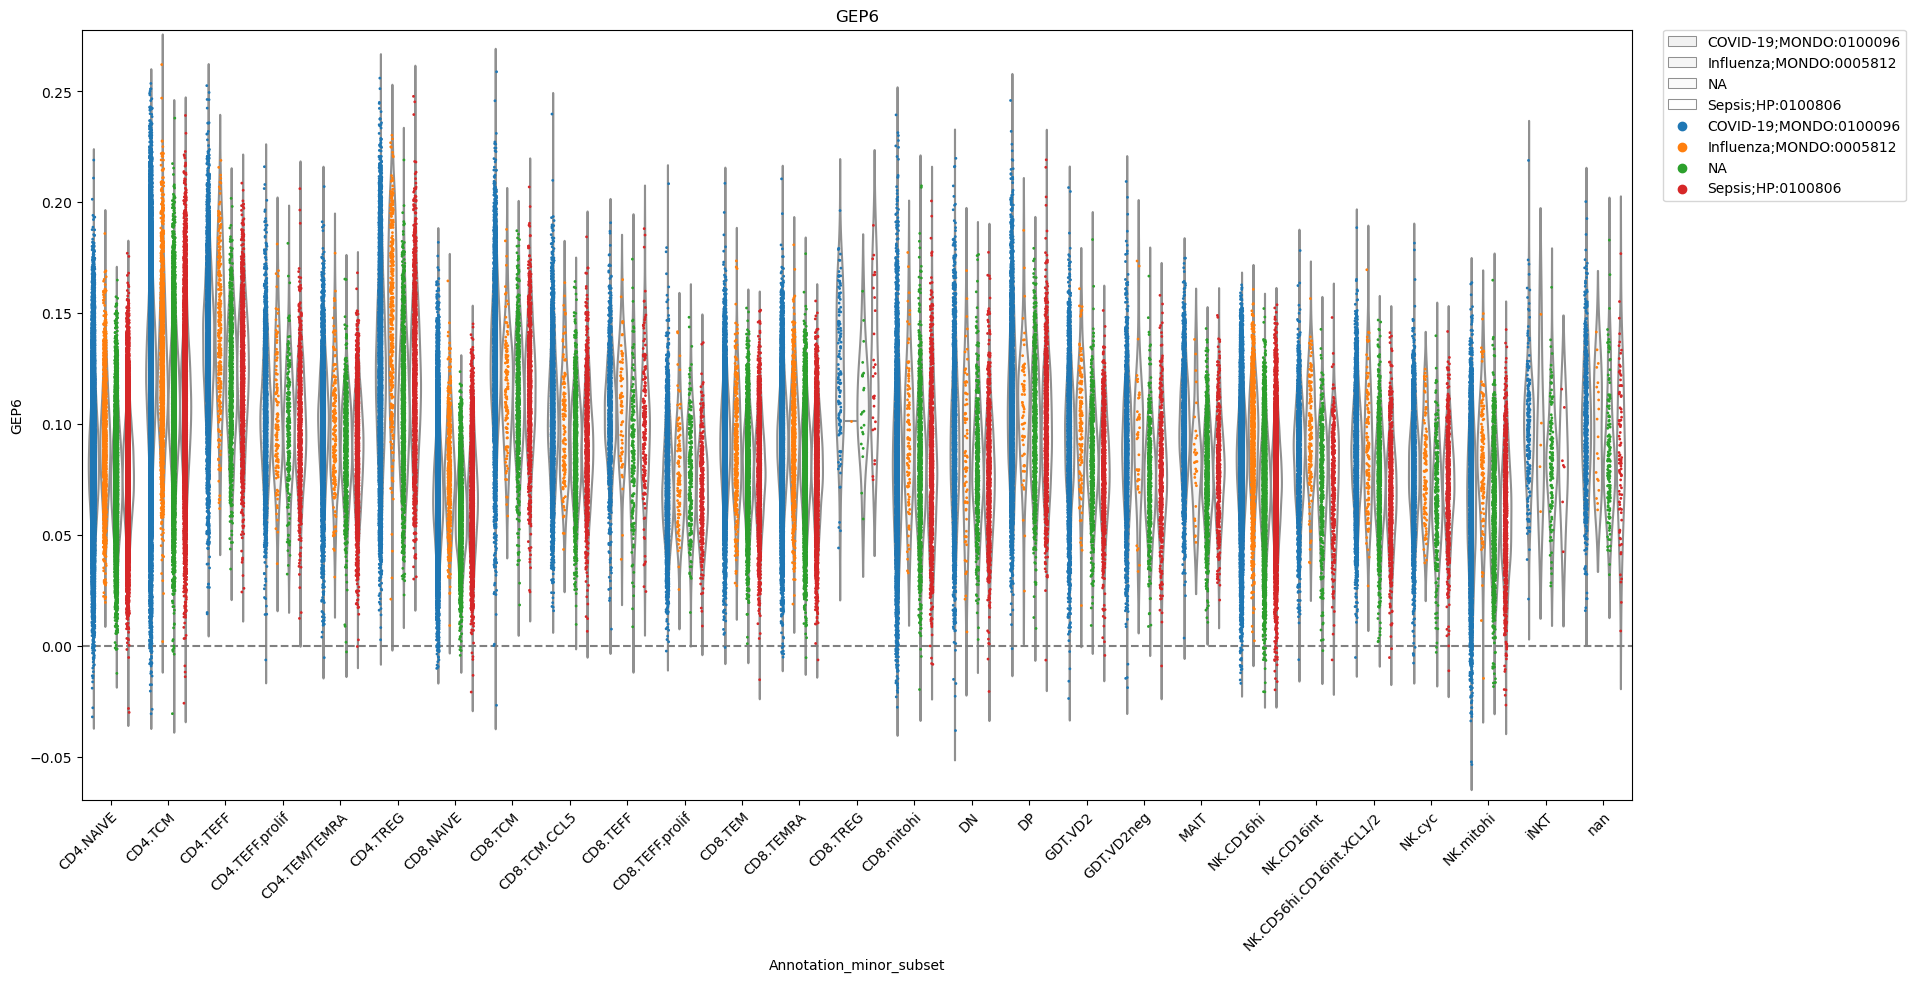

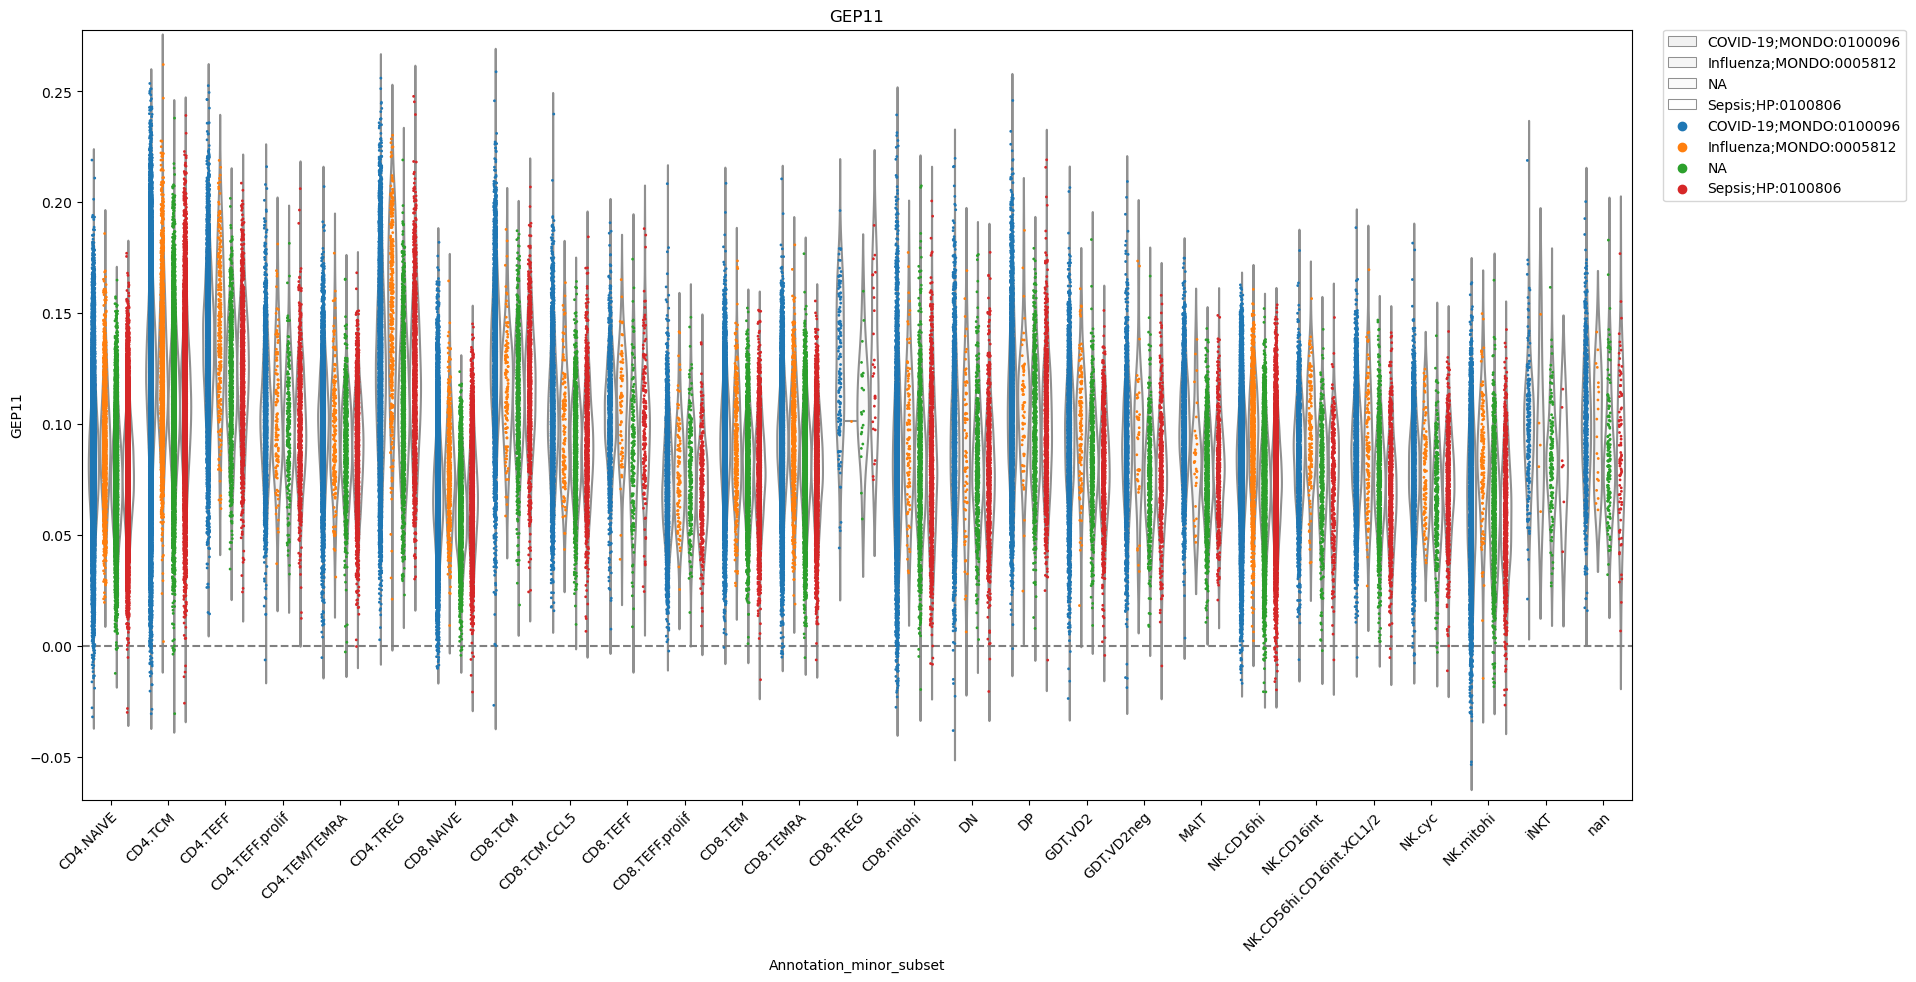

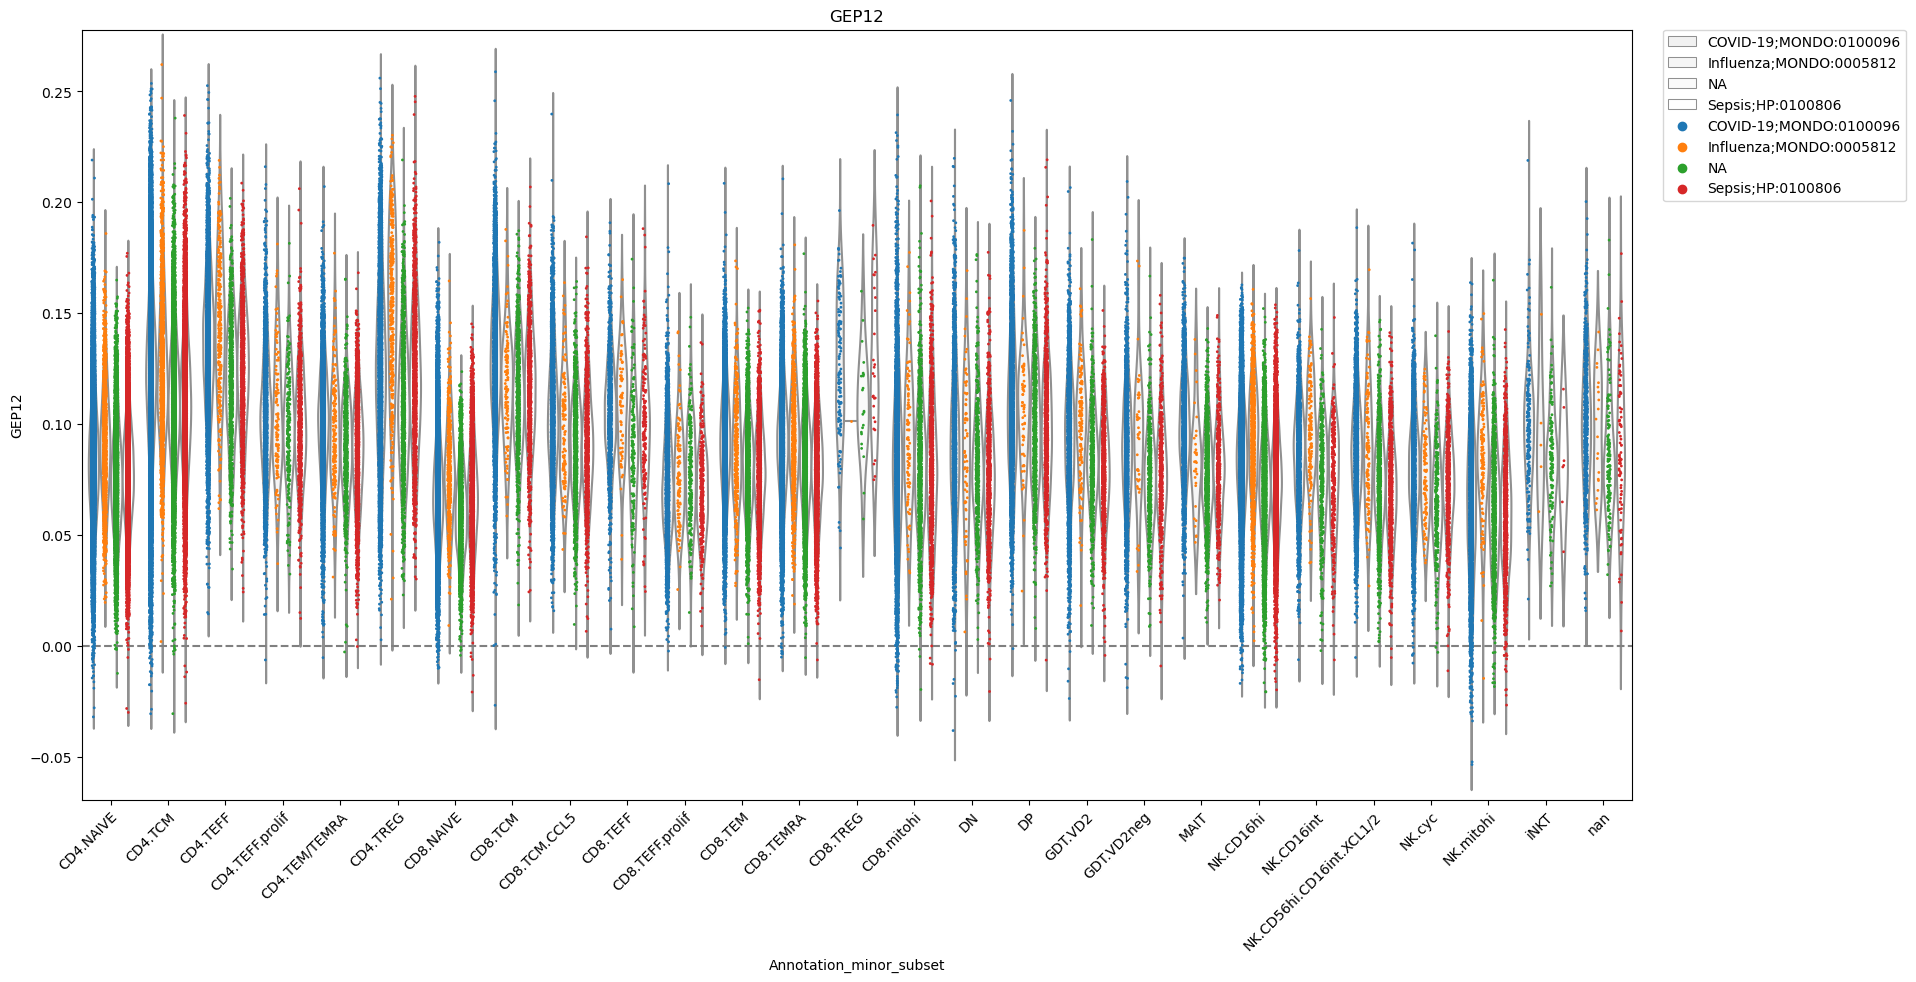

In [63]:
# Function to plot GEPs
def plot_vln(gep, title):
    plt.figure(figsize=(20,10))
    plt.axhline(y=0, linestyle="--", color="grey")
    ax=sns.violinplot(data=dataT.obs, x="Annotation_minor_subset", y=gep, hue="DiseaseClassification", color="white", inner=None)
    sns.stripplot(data=dataT.obs, x="Annotation_minor_subset", y=gep, hue="DiseaseClassification", jitter=True, dodge=True, size=2)
    #plt.ylim(-0.2, 0.8)
    plt.title(title)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
    plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", borderaxespad=0)
    # Save figure
    filename="/Users/scarcy/Projects/HumanThymusProject/scripts-in-progress/human-PBMC/HumanData_25_DiseaseGEPscoring/plots/covid_vlnplot_" + gep.lower() + ".jpeg"
    plt.savefig(fname=filename, dpi=300, bbox_inches="tight")

# Run!
plot_vln(gep="GEP1", title="GEP1")
plot_vln(gep="GEP4", title="GEP4")
plot_vln(gep="GEP5", title="GEP5")
plot_vln(gep="GEP6", title="GEP6")
plot_vln(gep="GEP11", title="GEP11")
plot_vln(gep="GEP12", title="GEP12")

[Text(0, 0, 'COVID-19;MONDO:0100096'),
 Text(1, 0, 'Influenza;MONDO:0005812'),
 Text(2, 0, 'NA'),
 Text(3, 0, 'Sepsis;HP:0100806')]

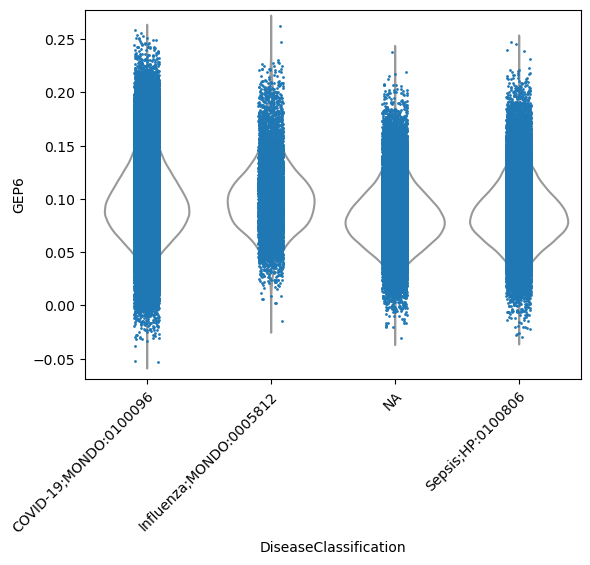

In [93]:
ax=sns.violinplot(data=dataT.obs, x="DiseaseClassification", y="GEP6", color="white", inner=None)
sns.stripplot(data=dataT.obs, x="DiseaseClassification", y="GEP6", jitter=True, dodge=True, size=2)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')

In [49]:
for col in dataT.obs.columns:
    print(col)

Annotation_cluster_id
Annotation_cluster_name
Annotation_minor_subset
Annotation_major_subset
Annotation_cell_type
GEX_region
QC_ngenes
QC_total_UMI
QC_pct_mitochondrial
QC_scrub_doublet_scores
TCR_chain_composition
TCR_clone_ID
TCR_clone_count
TCR_clone_proportion
TCR_contains_unproductive
TCR_doublet
TCR_chain_TRA
TCR_v_gene_TRA
TCR_d_gene_TRA
TCR_j_gene_TRA
TCR_c_gene_TRA
TCR_productive_TRA
TCR_cdr3_TRA
TCR_umis_TRA
TCR_chain_TRA2
TCR_v_gene_TRA2
TCR_d_gene_TRA2
TCR_j_gene_TRA2
TCR_c_gene_TRA2
TCR_productive_TRA2
TCR_cdr3_TRA2
TCR_umis_TRA2
TCR_chain_TRB
TCR_v_gene_TRB
TCR_d_gene_TRB
TCR_j_gene_TRB
TCR_c_gene_TRB
TCR_productive_TRB
TCR_chain_TRB2
TCR_v_gene_TRB2
TCR_d_gene_TRB2
TCR_j_gene_TRB2
TCR_c_gene_TRB2
TCR_productive_TRB2
TCR_cdr3_TRB2
TCR_umis_TRB2
BCR_umis_HC
BCR_contig_qc_HC
BCR_functionality_HC
BCR_v_call_HC
BCR_v_score_HC
BCR_j_call_HC
BCR_j_score_HC
BCR_junction_aa_HC
BCR_total_mut_HC
BCR_s_mut_HC
BCR_r_mut_HC
BCR_c_gene_HC
BCR_clone_per_replicate_HC
BCR_clone_global_HC

In [64]:
dataT.obs.DiseaseClassification.unique()

['COVID-19;MONDO:0100096', 'NA', 'Sepsis;HP:0100806', 'Influenza;MONDO:0005812']
Categories (4, object): ['COVID-19;MONDO:0100096', 'Influenza;MONDO:0005812', 'NA', 'Sepsis;HP:0100806']